#**Recomendador simple de productos**

Este proyecto es ideal porque aplica un concepto de machine learning muy popular en una aplicación de negocio muy clara. Se puede crear un sistema de recomendación que sugiera productos o contenido a los usuarios.

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
!pip install streamlit
import streamlit as st

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 108.4 MB/s eta 0:00:00


##**Generación de 1,000 datos de productos**

In [33]:
# Se utiliza una semilla para asegurar que los datos sean siempre los mismos.
np.random.seed(42)

# Se generan 1,000 productos con 5 características aleatorias.
# Las características (features) podrían representar cosas como precio, tamaño, etc.
# Se crean 5 columnas de números aleatorios para simular las características de los productos.
features_data = np.random.rand(1000, 5) * 100
product_ids = [f'product_{i+1}' for i in range(1000)]
products_df = pd.DataFrame(features_data, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'], index=product_ids)

##**2. Normalización de datos**

La normalización asegura que las diferentes características de los productos (como el precio, la calificación de estrellas, etc.) tengan el mismo peso.

La normalización es un paso crucial para que todas las características tengan el mismo peso y el sistema de recomendación no se incline hacia una sola.

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Se crea un objeto para escalar los datos.
scaler = MinMaxScaler()

# Se normalizan los datos para que todos los valores estén entre 0 y 1.
products_normalized = scaler.fit_transform(products_df)

# Se convierte de nuevo a un DataFrame con los mismos índices y columnas.
products_normalized_df = pd.DataFrame(products_normalized, columns=products_df.columns, index=products_df.index)

# Ahora, la matriz de similitud se calcula con los datos normalizados.
# Se reemplaza la siguiente línea:
# similarity_matrix = cosine_similarity(products_df)
# Por esta:
similarity_matrix = cosine_similarity(products_normalized_df)

##**3. Lógica del sistema: Cálculo de similitud**


In [35]:
# El "núcleo" del recomendador
# Se calcula la matriz de similitud usando la similitud del coseno.
# El resultado es una matriz donde cada valor indica la similitud entre dos productos.
similarity_matrix = cosine_similarity(products_df)

# Se convierte la matriz de similitud en un DataFrame de pandas para facilitar el trabajo.
similarity_df = pd.DataFrame(similarity_matrix, index=products_df.index, columns=products_df.index)

##**4. Función de recomendación**

In [36]:
def get_recommendations(product_id, similarity_df, num_recommendations=5):
    """
    Función que recomienda productos similares a un producto dado.

    Args:
        product_id (str): El ID del producto para el que se buscan recomendaciones.
        similarity_df (pd.DataFrame): La matriz de similitud de productos.
        num_recommendations (int): El número de recomendaciones a devolver.

    Returns:
        list: Una lista de los IDs de los productos recomendados.
    """
    if product_id not in similarity_df.index:
        print(f"Error: El producto '{product_id}' no se encuentra en el catálogo.")
        return []

    # Se obtienen las puntuaciones de similitud para el producto de referencia.
    similarity_scores = similarity_df[product_id]

    # Se ordenan las puntuaciones en orden descendente.
    # Se excluye el producto en sí mismo (su similitud es 1).
    sorted_scores = similarity_scores.sort_values(ascending=False)

    # Se obtienen los IDs de los productos más similares.
    top_recommendations = sorted_scores.index[1:num_recommendations+1]

    return top_recommendations.tolist()

# --- Ejemplo de uso con una muestra grande ---
# Se elige un producto al azar de la muestra.
target_product = np.random.choice(products_df.index)

# Se llama a la función para obtener las recomendaciones.
recommended_products = get_recommendations(target_product, similarity_df)

# Se imprimen los resultados para el usuario.
print(f"Producto de referencia: {target_product}")
print("---")
print("Productos recomendados:")
for product in recommended_products:
    print(f"- {product}")

Producto de referencia: product_51
---
Productos recomendados:
- product_765
- product_22
- product_671
- product_605
- product_13


##**5. Imprimir las características de los productos para ver la similitud.**



In [37]:
print("\nCaracterísticas del producto de referencia:")
print(products_df.loc[[target_product]])
print("\nCaracterísticas de los productos recomendados:")
print(products_df.loc[recommended_products])


Características del producto de referencia:
            feature_1  feature_2  feature_3  feature_4  feature_5
product_51  29.444889  38.509773  85.113667  31.692201  16.949275

Características de los productos recomendados:
             feature_1  feature_2  feature_3  feature_4  feature_5
product_765  35.081911  36.255980  80.571453  32.817948  20.905937
product_22   24.929223  41.038292  75.555114  22.879817   7.697991
product_671  21.491264  42.485084  90.783851  50.705965  18.792038
product_605  28.575832  43.276688  68.544388  33.245616   5.658566
product_13   38.867729  27.134903  82.873751  35.675333  28.093451


##**6. Uso del sistema y visualización de resultados**

In [38]:
# Se elige un producto al azar de la muestra. Esto simula que un usuario ha seleccionado un producto.
target_product = np.random.choice(products_df.index)

# Se llama a la función para obtener las recomendaciones.
recommended_products = get_recommendations(target_product, similarity_df)

# Se imprimen los resultados para el usuario.
print(f"Producto de referencia: {target_product}")
print("---")
print("Productos recomendados:")
for product in recommended_products:
    print(f"- {product}")

Producto de referencia: product_1000
---
Productos recomendados:
- product_898
- product_136
- product_124
- product_416
- product_556


##**7. Visualización de los Resultados**



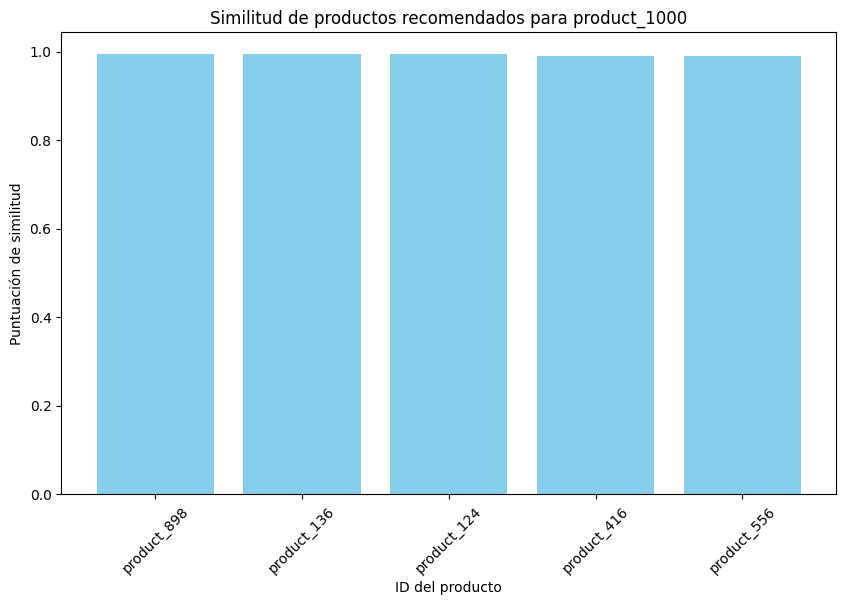

In [40]:
import matplotlib.pyplot as plt

# Se obtienen las puntuaciones de similitud para los productos recomendados.
# Se usa .loc[] para asegurar que el orden de los productos en el gráfico coincida
# con el orden de las recomendaciones.
recommended_scores = similarity_df.loc[target_product, recommended_products]

# Se crea un gráfico de barras para visualizar la similitud.
plt.figure(figsize=(10, 6))
# Se usa plt.bar() directamente para tener más control sobre la visualización.
plt.bar(x=recommended_scores.index, height=recommended_scores.values, color='skyblue')
plt.title(f'Similitud de productos recomendados para {target_product}')
plt.xlabel('ID del producto')
plt.ylabel('Puntuación de similitud')
plt.xticks(rotation=45)
plt.show()
plt.show()

##**8. Guardar los Resultados en un Archivo**


In [41]:
# Se crea un DataFrame con los productos recomendados y su puntuación de similitud.
results_df = pd.DataFrame({
    'product_id': recommended_products,
    'similitud': recommended_scores.values
})

# Se guarda el DataFrame en un archivo CSV.
results_df.to_csv('recomendaciones_finales.csv', index=False)
print("\nLos resultados han sido guardados en 'recomendaciones_finales.csv'")


Los resultados han sido guardados en 'recomendaciones_finales.csv'


##**9. Interfaz de Usuario Simple**

In [42]:
# Se añade un bucle para que el usuario pueda seguir pidiendo recomendaciones.
while True:
    user_input = input("\nIngresa el ID de un producto (ej: product_123) o 'salir': ")
    if user_input.lower() == 'salir':
        break

    # Se obtienen las recomendaciones para el producto ingresado por el usuario.
    user_recommendations = get_recommendations(user_input, similarity_df)

    if user_recommendations:
        print(f"Productos recomendados para {user_input}:")
        for product in user_recommendations:
            print(f"- {product}")


Ingresa el ID de un producto (ej: product_123) o 'salir': product_123
Productos recomendados para product_123:
- product_932
- product_843
- product_758
- product_879
- product_422

Ingresa el ID de un producto (ej: product_123) o 'salir': product_540
Productos recomendados para product_540:
- product_915
- product_741
- product_933
- product_267
- product_784

Ingresa el ID de un producto (ej: product_123) o 'salir': product_77
Productos recomendados para product_77:
- product_998
- product_899
- product_102
- product_451
- product_290

Ingresa el ID de un producto (ej: product_123) o 'salir': salir


##**10. Interfaz de usuario con Streamlit**

In [45]:
# Se crea el título de la aplicación.
st.title("Sistema de Recomendación de Productos")

# Se crea un selector para que el usuario elija un producto.
product_to_recommend = st.selectbox(
    'Selecciona un producto para ver las recomendaciones:',
    options=product_ids
)

# Se crea un botón para activar las recomendaciones.
if st.button('Obtener Recomendaciones'):
    # Se obtienen las recomendaciones y se muestran los resultados.
    recommended_products = get_recommendations(product_to_recommend, similarity_df)

    if recommended_products:
        st.subheader("Productos Recomendados")
        for product in recommended_products:
            st.write(f"- {product}")

        # --- Visualización de los Resultados ---
        # Se obtienen las puntuaciones de similitud para los productos recomendados.
        recommended_scores = similarity_df.loc[product_to_recommend, recommended_products]

        # Se crea un gráfico de barras para visualizar la similitud.
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.bar(x=recommended_scores.index, height=recommended_scores.values, color='skyblue')
        ax.set_title(f'Similitud de productos recomendados para {product_to_recommend}')
        ax.set_xlabel('ID del producto')
        ax.set_ylabel('Puntuación de similitud')
        ax.tick_params(axis='x', rotation=45)
        st.pyplot(fig)

        # --- Guardar los Resultados en un Archivo ---
        # Se crea un DataFrame con los productos recomendados y su puntuación de similitud.
        results_df = pd.DataFrame({
            'product_id': recommended_products,
            'similitud': recommended_scores.values
        })

        # Se guarda el DataFrame en un archivo CSV.
        results_df.to_csv('recomendaciones_finales.csv', index=False)
        st.success("Los resultados han sido guardados en 'recomendaciones_finales.csv'")

2025-09-02 22:17:15.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 22:17:15.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 22:17:15.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 22:17:15.442 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 22:17:15.443 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 22:17:15.444 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 22:17:15.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 22:17:15.447 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

##**11. Archivo app.py**

In [50]:
# Esta celda escribe el archivo 'app.py' en el entorno de Colab.
# Es el último paso en el cuaderno antes de subirlo a GitHub.
# NOTA: No se copia esta línea (%%writefile) en el archivo de GitHub.

%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Título de la aplicación
st.title('Dashboard de Marketing Digital 📈')
st.write('Analizando métricas clave para la optimización de la estrategia.')

# Carga de los datos (simulada)
df = pd.read_csv('fake_data.csv')
df['date'] = pd.to_datetime(df['date'])
tipos_de_contenido = ['Video', 'Imagen', 'Carrusel']
df['content_type'] = np.random.choice(tipos_de_contenido, size=len(df), p=[0.4, 0.4, 0.2])
df['day_of_week'] = df['date'].dt.day_name()
df['engagement_rate (%)'] = (df['likes'] + df['comments'] + df['shares']) / df['views'] * 100

# Gráfico 1: Evolución de Seguidores
st.subheader('1. Evolución de Seguidores')
fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(x='date', y='followers', data=df)
plt.title('Evolución del Número de Seguidores a lo largo del Tiempo')
st.pyplot(fig1)

# Gráfico 2: Distribución de Métricas
st.subheader('2. Distribución de Métricas')
fig2, ax2 = plt.subplots(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['likes'], kde=True)
plt.title('Distribución de Likes')
plt.subplot(2, 2, 2)
sns.histplot(df['comments'], kde=True)
plt.title('Distribución de Comentarios')
plt.subplot(2, 2, 3)
sns.histplot(df['shares'], kde=True)
plt.title('Distribución de Compartidos')
plt.tight_layout()
st.pyplot(fig2)

# Gráfico 3: Relación entre Vistas y Likes
st.subheader('3. Relación entre Vistas y Likes')
fig3, ax3 = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='views', y='likes', data=df)
plt.title('Relación entre Vistas y Likes')
st.pyplot(fig3)

# Gráfico 4: Comparación de Métricas
st.subheader('4. Comparación de Métricas')
fig4, ax4 = plt.subplots(figsize=(12, 6))
metricas_df = df[['likes', 'comments', 'shares', 'views', 'impressions', 'reach']]
metricas_df.sum().plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Comparación de Métricas Totales')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
st.pyplot(fig4)

# Gráfico 5: Top 10 Publicaciones
st.subheader('5. Top 10 Publicaciones')
top_posts = df.sort_values(by='likes', ascending=False).head(10)
fig5, ax5 = plt.subplots(figsize=(12, 6))
sns.barplot(x='likes', y='date', data=top_posts, palette='magma')
plt.title('Top 10 Publicaciones por Likes')
st.pyplot(fig5)


# Gráfico 6: Rendimiento del Engagement por Tipo de Contenido
st.subheader('6. Rendimiento del Engagement por Tipo de Contenido')
fig6, ax6 = plt.subplots(figsize=(10, 6))
sns.boxplot(x='content_type', y='engagement_rate (%)', data=df, palette='pastel')
plt.title('Rendimiento del Engagement por Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Tasa de Engagement (%)')
st.pyplot(fig6)

# Gráfico 7: Engagement Promedio por Día de la Semana
st.subheader('7. Engagement Promedio por Día de la Semana')
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig7, ax7 = plt.subplots(figsize=(12, 6))
sns.barplot(
    x='day_of_week',
    y='engagement_rate (%)',
    data=df,
    order=dias_ordenados,
    palette='coolwarm',
    estimator=np.mean,
    errorbar=None
)
plt.title('Engagement Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Tasa de Engagement Promedio (%)')
plt.xticks(rotation=45)
st.pyplot(fig7)

# Gráfico 8: Matriz de Correlación General
st.subheader('8. Matriz de Correlación General')
df_numerico = df.select_dtypes(include=['number'])
correlation_matrix = df_numerico.corr()
fig8, ax8 = plt.subplots(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Métricas')
st.pyplot(fig8)

# Sección de conclusiones
st.subheader('Conclusiones')
st.write('---')
st.write('Este dashboard es un ejemplo de cómo transformar un análisis técnico en una herramienta de negocio funcional. La metodología utilizada demuestra mi capacidad para generar **insights accionables** que impulsan el crecimiento empresarial.')

Overwriting app.py
